In [1]:
#Importing the dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST dataset from Keras

In [2]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)
type(X_train)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


numpy.ndarray

Training Data - 60000 Images
Testing Data - 10000 Images

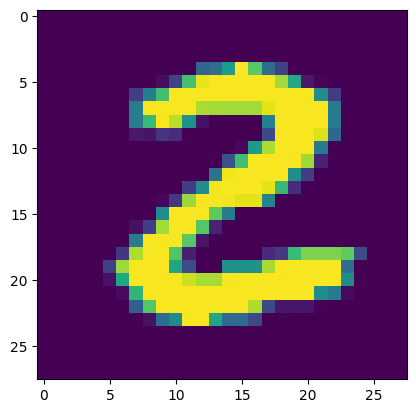

2


In [4]:
#display an image
plt.imshow(X_train[25])
plt.show()

#display the corresponding label
print(Y_train[25])

In [5]:
#Unique values in Y_train and Y_test
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [6]:
#Scaling the values so that all values lie in the same range
X_train = X_train/255
X_test = X_test/255

In [7]:
print(X_train[20])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
#Building the neural network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50,activation="relu"),
                          keras.layers.Dense(50,activation="relu"),
                          keras.layers.Dense(10,activation="sigmoid")
])

In [9]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [10]:
model.fit(X_train,Y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3004 - accuracy: 0.9140
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1319 - accuracy: 0.9609
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0986 - accuracy: 0.9708
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0802 - accuracy: 0.9753
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0671 - accuracy: 0.9793
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0574 - accuracy: 0.9819
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0508 - accuracy: 0.9835
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0435 - accuracy: 0.9862
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0393 - accuracy: 0.9872
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.03

Training data accuracy - 98.83%

In [11]:
#accuracy of testing data
loss,accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0995 - accuracy: 0.9739
0.9739000201225281


Testing data accuracy - 97.40%

In [12]:
print(X_test.shape)

(10000, 28, 28)


In [13]:
print(X_test[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

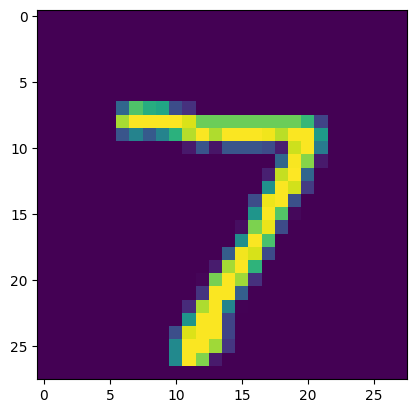

In [14]:
plt.imshow(X_test[0])
plt.show()

In [15]:
print(Y_test[0])

7


In [16]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [17]:
print(Y_pred.shape)

(10000, 10)


In [18]:
print(Y_pred[0])

[1.9596104e-02 2.6641947e-03 5.2499795e-01 9.9251980e-01 1.0550108e-05
 5.1084287e-03 4.0032305e-12 1.0000000e+00 9.5463745e-02 8.3255476e-01]


In [19]:
label_for_image = np.argmax(Y_pred[0])
print(label_for_image)

7


In [20]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [21]:
conf_mat = confusion_matrix(Y_test,Y_pred_labels)

In [22]:
print(conf_mat)

tf.Tensor(
[[ 963    0    2    2    0    5    4    1    2    1]
 [   0 1125    3    0    0    1    2    0    4    0]
 [   4    1 1006    1    2    1    3    8    5    1]
 [   0    0    7  978    0   13    0    2    9    1]
 [   0    1    3    1  954    3    5    1    2   12]
 [   1    0    1    4    1  872    3    0    5    5]
 [   5    2    1    1    5   11  927    0    6    0]
 [   1    6   13    1    1    0    0  996    3    7]
 [   2    1    3    4    2   13    1    3  940    5]
 [   1    3    0    4    7    7    0    5    4  978]], shape=(10, 10), dtype=int32)


Text(158.22222222222223, 0.5, 'Predicted Labels')

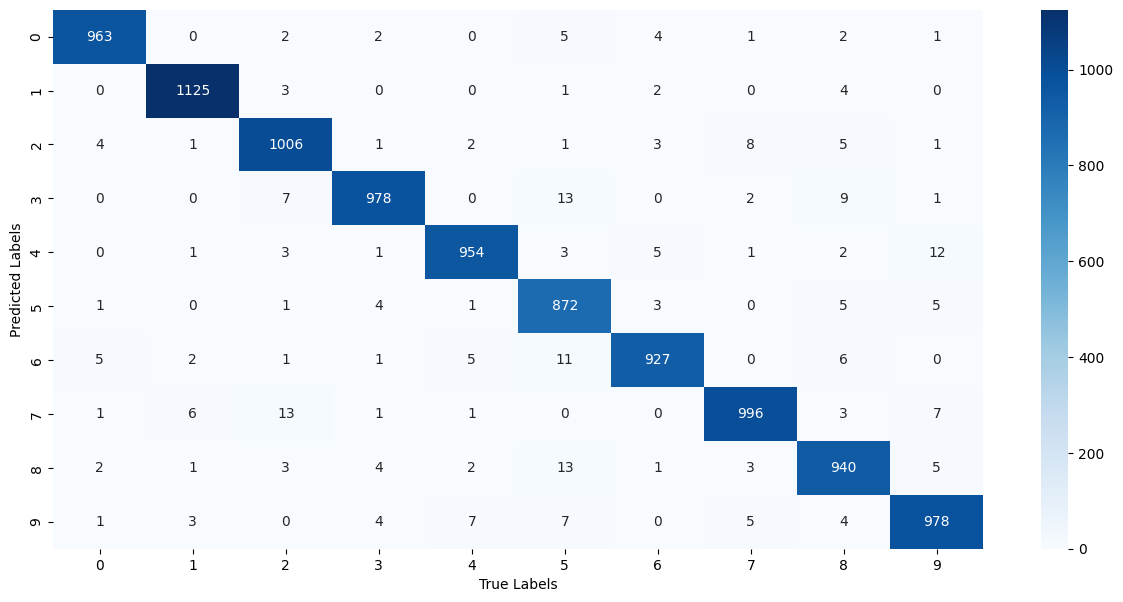

In [23]:
plt.figure(figsize= (15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap = 'Blues')
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")

In [24]:
#Making a predictive system
input_image_path = input("Enter the path of the image:")

input_image = cv2.imread(input_image_path)

grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

input_image_resized = cv2.resize(grayscale,(28,28))

input_image_resized = input_image_resized/255

image_reshaped = np.reshape(input_image_resized,[1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print("The handwritten digit is recognized as:",input_pred_label)

Enter the path of the image:/content/mnisttest.png
1/1 [==============================] - 0s 28ms/step
The handwritten digit is recognized as: 2
